# ДЗ2: Pandas и визуализация в Python, Стрельцова Александра, Б06-004

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv('flight_delays.csv')
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


## 1. Посчитаем долю задержек по отношению ко всем вылетам

In [129]:
data['dep_delayed_15min'].value_counts()       

N    80956
Y    19044
Name: dep_delayed_15min, dtype: int64

Доля задержек 0.19044


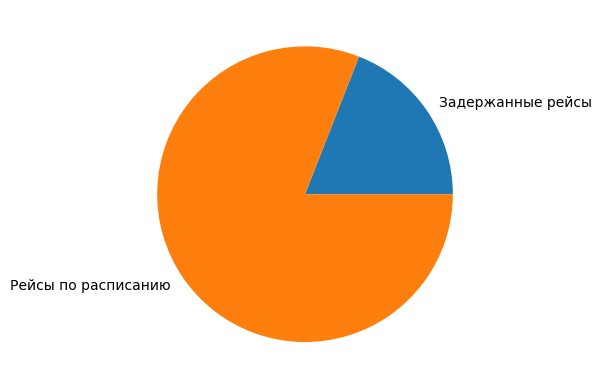

In [130]:
delays = len(data[data['dep_delayed_15min']=='Y'])
no_delay = len(data[data['dep_delayed_15min']=='N'])
flights = delays + no_delay
dolya = delays/flights
print('Доля задержек', dolya)
val = [delays, no_delay]
label = ["Задержанные рейсы", "Рейсы по расписанию"]
plt.pie(val, labels = label)
plt.show()


## 2. Найдем зависимость количества задержек от длины пути, который предстоит пролететь самолету

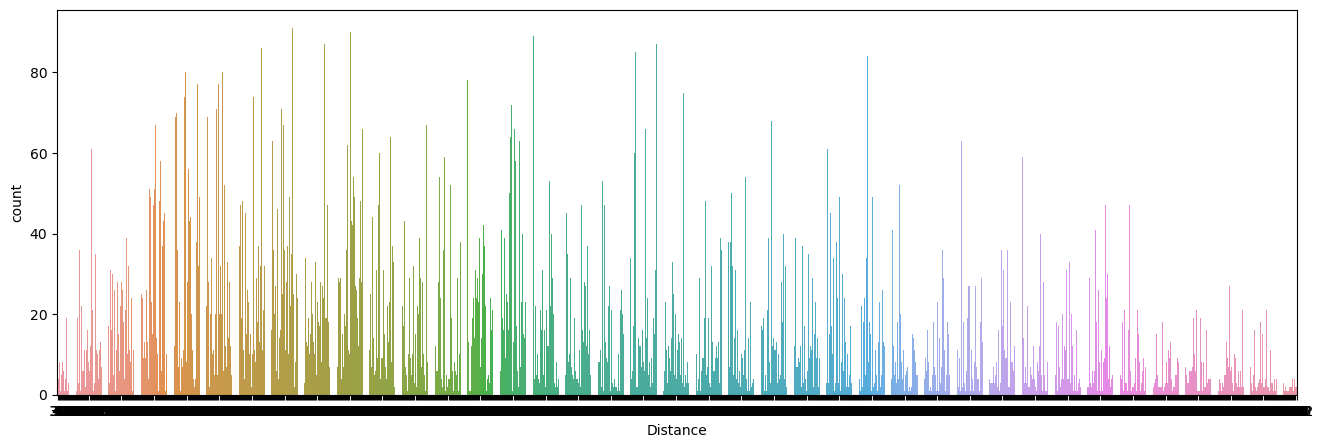

In [131]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
sns.countplot(x='Distance',data = data[data['dep_delayed_15min']=='Y']); #фильтруем данные 
#выбираем только задержанные рейсы и строим зависимость количества задержек от расстояния

## 3. Найдем топ 5 направлений, для которых чаще всего происходят задержки

In [132]:
data_delay = data[data['dep_delayed_15min']=='Y']
data_delay.head(10)
freq = data_delay['Dest'].value_counts()
print(freq)

ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
       ... 
CIC       1
BGM       1
HTS       1
FLO       1
BRW       1
Name: Dest, Length: 276, dtype: int64


Таким образом, топ-5 направлений по задержкам: ATL, ORD, DFW, EWR и LAX. Это видно и на диаграмме ниже:


<Axes: >

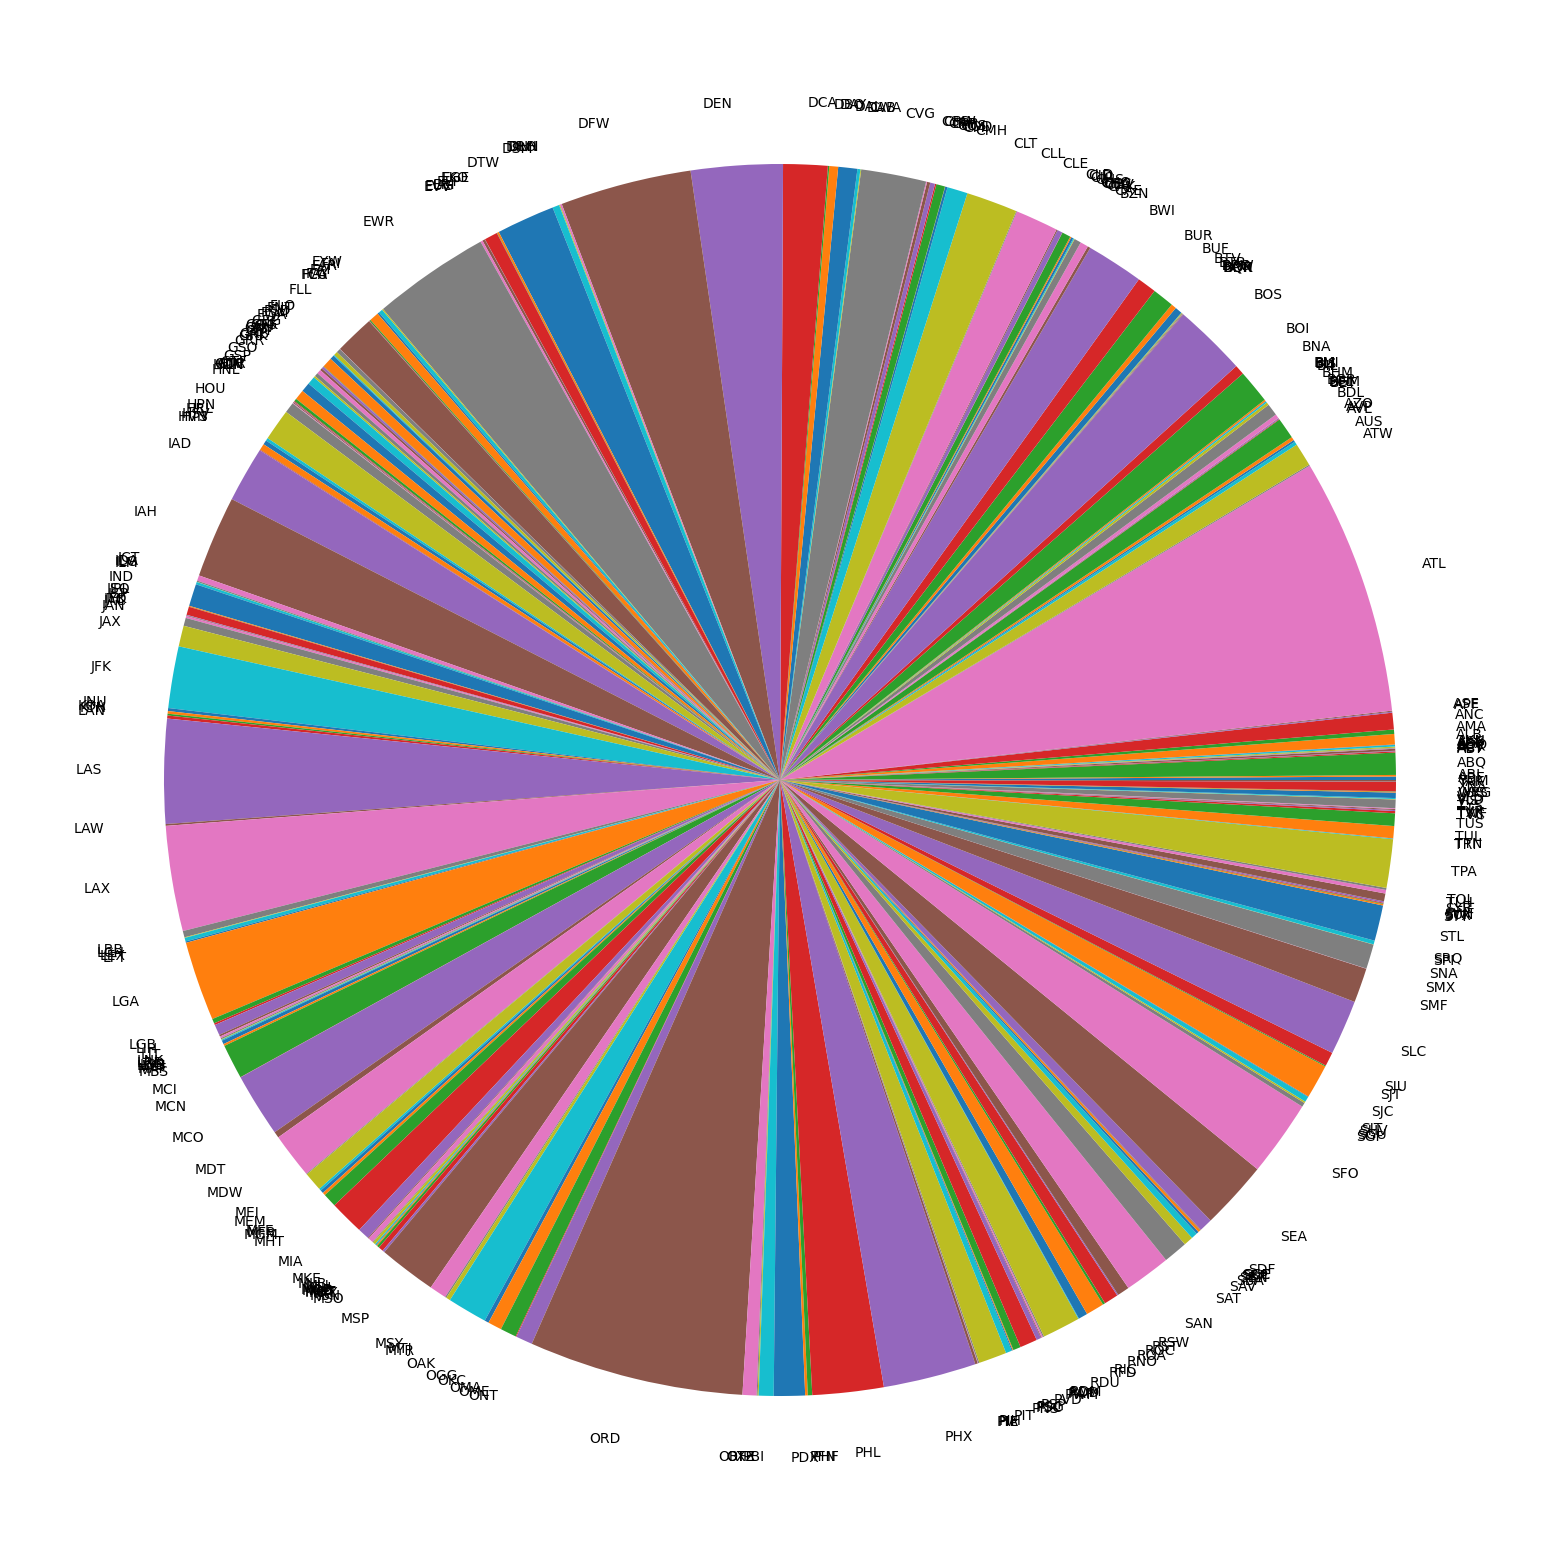

In [133]:
d = data_delay.groupby('Dest').size()
d.plot(kind='pie', figsize =(20,20))

## 4. Найдем, в какие времена года чаще всего происходят задержки рейсов

In [134]:
fre = data_delay['Month'].value_counts()
print(fre)

c-7     2073
c-12    1994
c-6     1867
c-8     1783
c-3     1676
c-1     1539
c-10    1501
c-11    1397
c-2     1316
c-5     1313
c-4     1306
c-9     1279
Name: Month, dtype: int64


Здесь видно, что в топ месяцев по задержке входят все три месяца лета. Таким образом, именно летом чаще всего происходят задержки рейсов.

<Axes: >

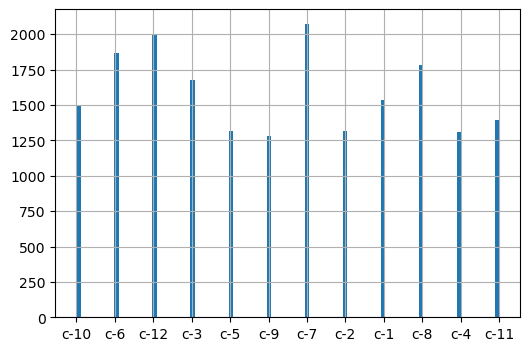

In [135]:
data_delay['Month'].hist(figsize=(6, 4), bins=100)

## 5. Найдем топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [136]:
fr_1 = data_delay['UniqueCarrier'].value_counts().to_frame() #таблица количества задержек
fr_1.head()


,UniqueCarrier
WN,3219
AA,1770
MQ,1448
DL,1373
UA,1322


In [137]:
data_nodelay = data[data['dep_delayed_15min']=='N']
fr_2 = data_nodelay['UniqueCarrier'].value_counts().to_frame() #таблица количества отсутствия задержек
fr_2.head()

,UniqueCarrier
WN,11863
AA,7648
DL,6755
OO,6113
MQ,5995


In [138]:
s = pd.concat([fr_1,fr_2], axis =1) #сводная таблица для подсчёта доли задержек
s.columns = ['Delays','NoDelays']
s.head()

,Delays,NoDelays
WN,3219,11863
AA,1770,7648
MQ,1448,5995
DL,1373,6755
UA,1322,5554


Выше представлена статистика по количеству

In [139]:
s['dolya'] = s['Delays'] / s['NoDelays']
h = s.sort_values(by='dolya', ascending = True)
h.head(10) # показываем  10 лучших перевозчиков с минимальной долей задержек

,Delays,NoDelays,dolya
HA,33,729,0.045267
AQ,18,216,0.083333
HP,196,1182,0.165821
TZ,64,382,0.167539
F9,156,850,0.183529
DH,156,810,0.192593
US,1085,5397,0.201038
NW,1075,5328,0.201764
DL,1373,6755,0.203257
OO,1277,6113,0.208899


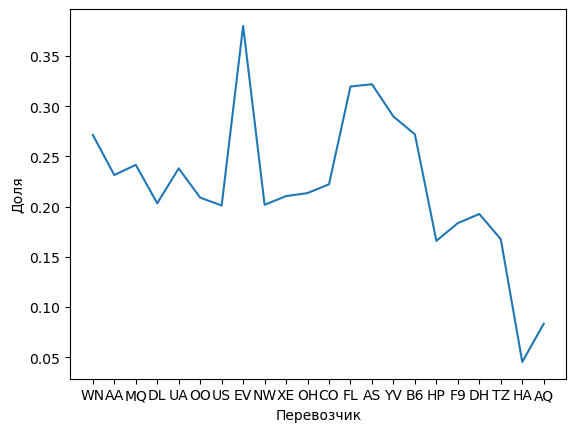

In [140]:
plt.plot(s.index, s['dolya'])
plt.xlabel('Перевозчик')
plt.ylabel('Доля')
plt.show()

## 6. Найдем топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [141]:
f_1 = data_delay['Origin'].value_counts().to_frame() #таблица количества задержек
f_1.head()

,Origin
ATL,1506
ORD,1254
DFW,902
DEN,575
LAX,552


In [142]:
f_2 = data_nodelay['Origin'].value_counts().to_frame() #таблица количества отсутствия задержек
f_2.head()

,Origin
ATL,4328
ORD,3616
DFW,3368
LAX,2707
IAH,2556


In [143]:
c = pd.concat([f_1,f_2], axis =1) #сводная таблица для подсчёта доли задержек
c.columns = ['Delays','NoDelays']
c.head()

,Delays,NoDelays
ATL,1506.0,4328.0
ORD,1254.0,3616.0
DFW,902.0,3368.0
DEN,575.0,2398.0
LAX,552.0,2707.0


In [144]:
c['dolya'] = c['Delays'] / c['NoDelays']
g = c.sort_values(by='dolya', ascending = False)
g.head(10) #показываем 10 самых безобразных аэропортов


,Delays,NoDelays,dolya
LWB,3.0,1.0,3.000000
BRW,5.0,2.0,2.500000
GUC,8.0,4.0,2.000000
ADQ,3.0,2.0,1.500000
SCC,2.0,2.0,1.000000
TEX,1.0,1.0,1.000000
DLG,2.0,3.0,0.666667
EGE,9.0,16.0,0.562500
BET,7.0,14.0,0.500000
PSG,6.0,12.0,0.500000


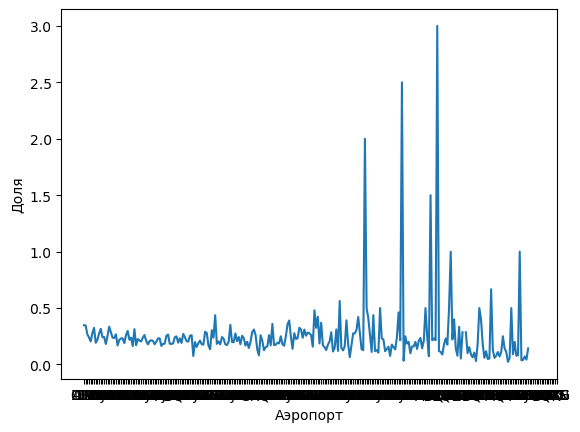

In [145]:
plt.plot(c.index, c['dolya'])
plt.xlabel('Аэропорт')
plt.ylabel('Доля')
plt.show()

## 7. Найдем необычную зависимость количества задержек от имеющихся данных

Я не очень поняла, что нужно в этом пункте, но вот зависимость для дней недели: самый неудачный день - пятница, а самый удачный - суббота. А эти два дня рядом по сути

In [146]:
e = data_delay['DayOfWeek'].value_counts().to_frame()
e.columns = ['Delays']

e.head()

,Delays
c-5,3285
c-4,3117
c-1,2774
c-7,2705
c-3,2567


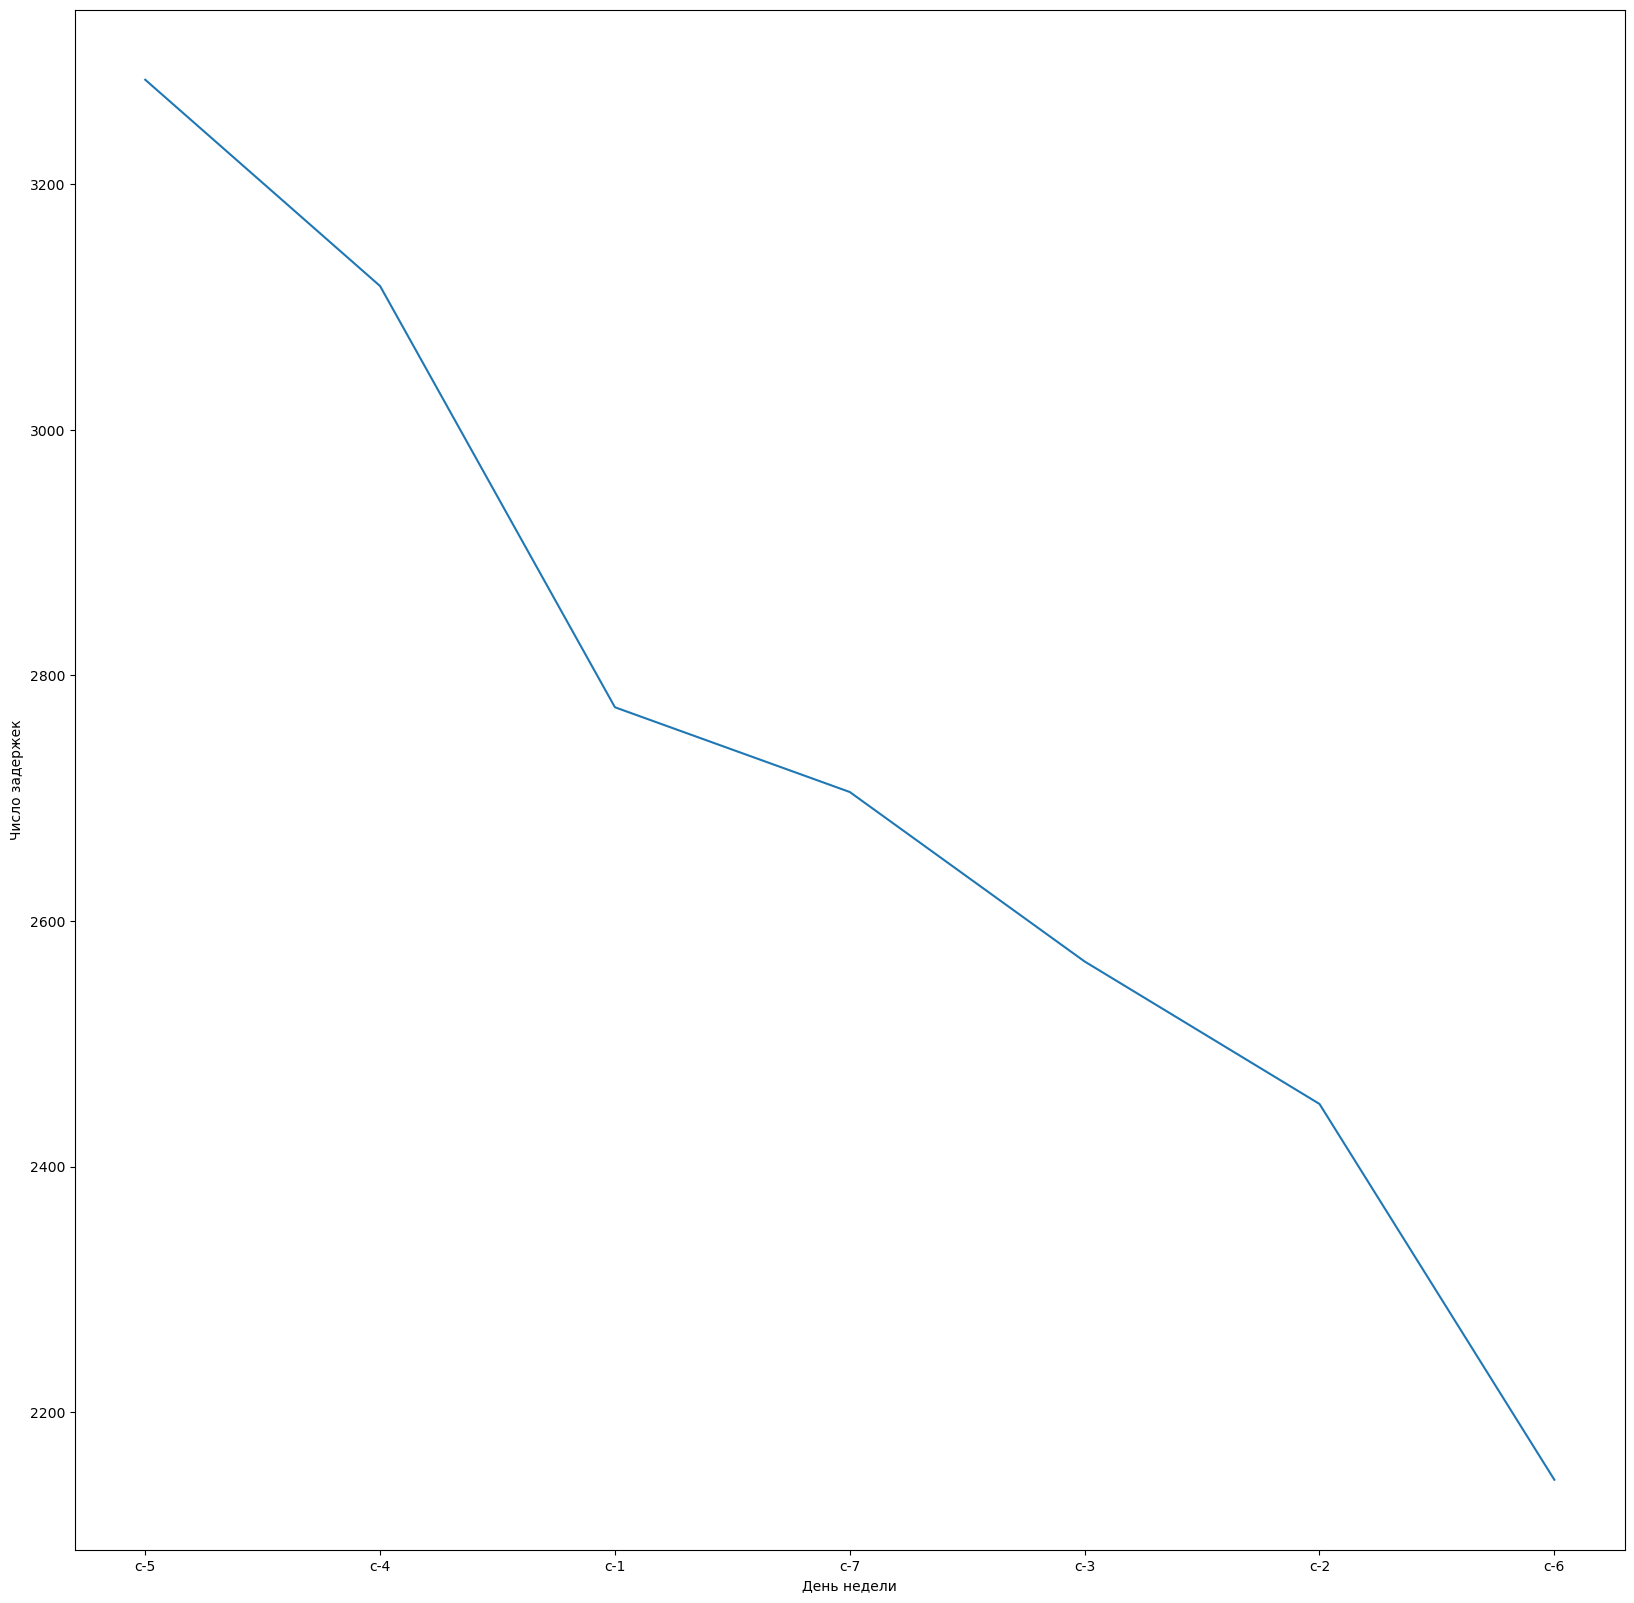

In [147]:
plt.figure(figsize=(20,20))
plt.plot(e.index, e['Delays'])
plt.xlabel('День недели')
plt.ylabel('Число задержек')
plt.show()